In [ ]:
#pip install backtrader yfinance

In [1]:
import backtrader as bt
import yfinance as yf
from datetime import datetime

class RSIBB_ADX_Strategy(bt.Strategy):
    params = (
        ('short_ema_period', 20),
        ('tolerance', 5),
        ('rsi_period', 14),
        ('rsi_buy', 35),
        ('rsi_sell', 65),
        ('bb_period', 21),
        ('bb_dev', 2),
        ('consecutive_loss', 2),
        ('delay_bar', 4),
        ('ranging_sl', 40),
        ('ranging_tp', 45),
        ('trending_sl', 55),
        ('trending_tp', 75),
        ('adx_period', 14),
        ('adx_trend_threshold', 40),
        ('adx_range_threshold', 29),
        ('lot_step', 2),
        ('base_lots', 0.01),
        ('magic_number', 38467),
    )

    def __init__(self):
        self.ema_short = bt.indicators.EMA(self.data.close, period=self.params.short_ema_period)
        self.rsi = bt.indicators.RSI(self.data.close, period=self.params.rsi_period)
        self.bbands = bt.indicators.BollingerBands(self.data.close, period=self.params.bb_period, devfactor=self.params.bb_dev)
        self.adx = bt.indicators.AverageDirectionalMovementIndex(self.data, period=self.params.adx_period)

        self.order = None
        self.consecutive_losses = 0
        self.last_trade_time = None

    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print(f'{dt.isoformat()} {txt}')

    def next(self):
        if self.order:
            return

        if self.last_trade_time and len(self.data) - self.last_trade_time < self.params.delay_bar:
            return

        if self.adx.adx[0] < self.params.adx_range_threshold:
            self.ranging_strategy()
        elif self.adx.adx[0] > self.params.adx_trend_threshold:
            self.trending_strategy()

    def ranging_strategy(self):
        if self.rsi[0] <= self.params.rsi_buy and self.data.close[-1] > self.bbands.lines.bot[-1] and self.data.close[0] < self.bbands.lines.bot[0]:
            self.buy_trade()
        elif self.rsi[0] >= self.params.rsi_sell and self.data.close[-1] < self.bbands.lines.top[-1] and self.data.close[0] > self.bbands.lines.top[0]:
            self.sell_trade()

    def trending_strategy(self):
        if self.data.close[0] > self.ema_short[0]:
            self.buy_trade()
        elif self.data.close[0] < self.ema_short[0]:
            self.sell_trade()

    def buy_trade(self):
        self.log('BUY CREATE, %.2f' % self.data.close[0])
        self.order = self.buy()

    def sell_trade(self):
        self.log('SELL CREATE, %.2f' % self.data.close[0])
        self.order = self.sell()

    def notify_order(self, order):
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log('BUY EXECUTED, %.2f' % order.executed.price)
            elif order.issell():
                self.log('SELL EXECUTED, %.2f' % order.executed.price)

            self.last_trade_time = len(self.data)
            self.consecutive_losses = 0 if order.profit else self.consecutive_losses + 1
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' % (trade.pnl, trade.pnlcomm))

# Create a cerebro entity
cerebro = bt.Cerebro()

# Add a strategy
cerebro.addstrategy(RSIBB_ADX_Strategy)

# Download data from Yahoo Finance
data = bt.feeds.PandasData(dataname=yf.download('GBPUSD=X', '2020-01-01', '2024-01-01'))

# Add the data feed to Cerebro
cerebro.adddata(data)

# Set the starting cash
cerebro.broker.set_cash(10000.0)

# Set the commission
cerebro.broker.setcommission(commission=0.001)

# Run over everything
cerebro.run()

# Plot the result
cerebro.plot()


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['GBPUSD=X']: ConnectionError(MaxRetryError("HTTPSConnectionPool(host='fc.yahoo.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001C854A645E0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))"))


IndexError: array assignment index out of range

In [2]:
import backtrader as bt
import yfinance as yf
from datetime import datetime

class RSIBB_ADX_Strategy(bt.Strategy):
    params = (
        ('short_ema_period', 20),
        ('tolerance', 5),
        ('rsi_period', 14),
        ('rsi_buy', 35),
        ('rsi_sell', 65),
        ('bb_period', 21),
        ('bb_dev', 2),
        ('consecutive_loss', 2),
        ('delay_bar', 4),
        ('ranging_sl', 40),
        ('ranging_tp', 45),
        ('trending_sl', 55),
        ('trending_tp', 75),
        ('adx_period', 14),
        ('adx_trend_threshold', 40),
        ('adx_range_threshold', 29),
        ('lot_step', 2),
        ('base_lots', 0.01),
        ('magic_number', 38467),
    )

    def __init__(self):
        self.ema_short = bt.indicators.EMA(self.data.close, period=self.params.short_ema_period)
        self.rsi = bt.indicators.RSI(self.data.close, period=self.params.rsi_period)
        self.bbands = bt.indicators.BollingerBands(self.data.close, period=self.params.bb_period, devfactor=self.params.bb_dev)
        self.adx = bt.indicators.AverageDirectionalMovementIndex(self.data, period=self.params.adx_period)

        self.order = None
        self.consecutive_losses = 0
        self.last_trade_time = None

    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print(f'{dt.isoformat()} {txt}')

    def next(self):
        if self.order:
            return

        if self.last_trade_time and len(self.data) - self.last_trade_time < self.params.delay_bar:
            return

        if len(self.data) < max(self.params.short_ema_period, self.params.rsi_period, self.params.bb_period, self.params.adx_period):
            return

        if self.adx.adx[0] < self.params.adx_range_threshold:
            self.ranging_strategy()
        elif self.adx.adx[0] > self.params.adx_trend_threshold:
            self.trending_strategy()

    def ranging_strategy(self):
        if self.rsi[0] <= self.params.rsi_buy and self.data.close[-1] > self.bbands.lines.bot[-1] and self.data.close[0] < self.bbands.lines.bot[0]:
            self.buy_trade()
        elif self.rsi[0] >= self.params.rsi_sell and self.data.close[-1] < self.bbands.lines.top[-1] and self.data.close[0] > self.bbands.lines.top[0]:
            self.sell_trade()

    def trending_strategy(self):
        if self.data.close[0] > self.ema_short[0]:
            self.buy_trade()
        elif self.data.close[0] < self.ema_short[0]:
            self.sell_trade()

    def buy_trade(self):
        self.log('BUY CREATE, %.2f' % self.data.close[0])
        self.order = self.buy()

    def sell_trade(self):
        self.log('SELL CREATE, %.2f' % self.data.close[0])
        self.order = self.sell()

    def notify_order(self, order):
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log('BUY EXECUTED, %.2f' % order.executed.price)
            elif order.issell():
                self.log('SELL EXECUTED, %.2f' % order.executed.price)

            self.last_trade_time = len(self.data)
            self.consecutive_losses = 0 if order.profit else self.consecutive_losses + 1
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' % (trade.pnl, trade.pnlcomm))

def download_data(ticker, start, end):
    try:
        data = yf.download(ticker, start=start, end=end)
        if not data.empty:
            return data
        else:
            raise Exception('No data returned from Yahoo Finance.')
    except Exception as e:
        print(f"Error downloading data: {e}")
        # Handle alternative data source or other error handling
        return None

# Create a cerebro entity
cerebro = bt.Cerebro()

# Add a strategy
cerebro.addstrategy(RSIBB_ADX_Strategy)

# Download data
data = download_data('GBPUSD=X', '2020-01-01', '2024-01-01')

if data is not None:
    # Add the data feed to Cerebro
    data_feed = bt.feeds.PandasData(dataname=data)
    cerebro.adddata(data_feed)

    # Set the starting cash
    cerebro.broker.set_cash(10000.0)

    # Set the commission
    cerebro.broker.setcommission(commission=0.001)

    # Run over everything
    cerebro.run()

    # Plot the result
    cerebro.plot()
else:
    print("No data available for backtesting.")


[*********************100%%**********************]  1 of 1 completed


2020-03-13 BUY CREATE, 1.26
2020-03-16 BUY EXECUTED, 1.24


AttributeError: 'AutoInfoClass_OrderBase_Order_BuyOrder' object has no attribute 'profit'

[*********************100%%**********************]  1 of 1 completed


2020-03-13 BUY CREATE, 1.26
2020-03-16 BUY EXECUTED, 1.24
2020-05-18 BUY CREATE, 1.21
2020-05-19 BUY EXECUTED, 1.22
2020-07-28 SELL CREATE, 1.29
2020-07-29 SELL EXECUTED, 1.29
2020-12-17 SELL CREATE, 1.35
2020-12-18 SELL EXECUTED, 1.36
2020-12-18 OPERATION PROFIT, GROSS 0.19, NET 0.18
2021-02-15 SELL CREATE, 1.39
2021-02-16 SELL EXECUTED, 1.39
2021-07-20 BUY CREATE, 1.37
2021-07-21 BUY EXECUTED, 1.36
2021-07-21 OPERATION PROFIT, GROSS 0.03, NET 0.03
2021-08-20 BUY CREATE, 1.36
2021-08-23 BUY EXECUTED, 1.36
2021-11-11 BUY CREATE, 1.34
2021-11-12 BUY EXECUTED, 1.34
2022-02-25 BUY CREATE, 1.34
2022-02-28 BUY EXECUTED, 1.34
2022-03-07 BUY CREATE, 1.32
2022-03-08 BUY EXECUTED, 1.31
2022-04-25 BUY CREATE, 1.28
2022-04-26 BUY EXECUTED, 1.27
2022-05-04 SELL CREATE, 1.25
2022-05-05 SELL EXECUTED, 1.26
2022-05-11 SELL CREATE, 1.23
2022-05-12 SELL EXECUTED, 1.22
2022-05-18 SELL CREATE, 1.25
2022-05-19 SELL EXECUTED, 1.23
2022-07-15 SELL CREATE, 1.18
2022-07-18 SELL EXECUTED, 1.19
2022-09-27 SELL 

<IPython.core.display.Javascript object>


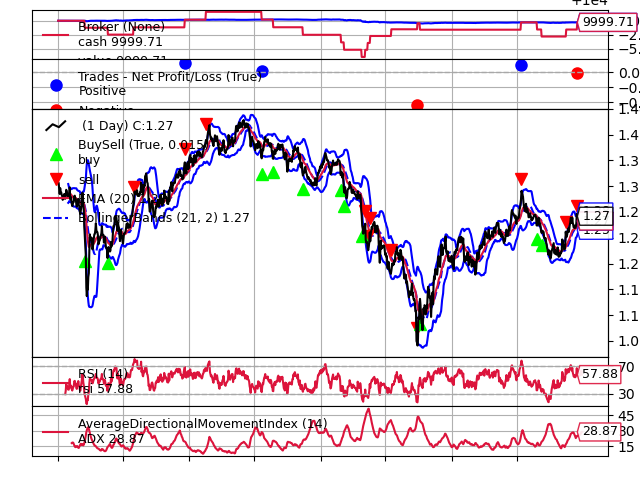

In [3]:
import backtrader as bt
import yfinance as yf
from datetime import datetime

class RSIBB_ADX_Strategy(bt.Strategy):
    params = (
        ('short_ema_period', 20),
        ('tolerance', 5),
        ('rsi_period', 14),
        ('rsi_buy', 35),
        ('rsi_sell', 65),
        ('bb_period', 21),
        ('bb_dev', 2),
        ('consecutive_loss', 2),
        ('delay_bar', 4),
        ('ranging_sl', 40),
        ('ranging_tp', 45),
        ('trending_sl', 55),
        ('trending_tp', 75),
        ('adx_period', 14),
        ('adx_trend_threshold', 40),
        ('adx_range_threshold', 29),
        ('lot_step', 2),
        ('base_lots', 0.01),
        ('magic_number', 38467),
    )

    def __init__(self):
        self.ema_short = bt.indicators.EMA(self.data.close, period=self.params.short_ema_period)
        self.rsi = bt.indicators.RSI(self.data.close, period=self.params.rsi_period)
        self.bbands = bt.indicators.BollingerBands(self.data.close, period=self.params.bb_period, devfactor=self.params.bb_dev)
        self.adx = bt.indicators.AverageDirectionalMovementIndex(self.data, period=self.params.adx_period)

        self.order = None
        self.consecutive_losses = 0
        self.last_trade_time = None

    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print(f'{dt.isoformat()} {txt}')

    def next(self):
        if self.order:
            return

        if self.last_trade_time and len(self.data) - self.last_trade_time < self.params.delay_bar:
            return

        if len(self.data) < max(self.params.short_ema_period, self.params.rsi_period, self.params.bb_period, self.params.adx_period):
            return

        if self.adx.adx[0] < self.params.adx_range_threshold:
            self.ranging_strategy()
        elif self.adx.adx[0] > self.params.adx_trend_threshold:
            self.trending_strategy()

    def ranging_strategy(self):
        if self.rsi[0] <= self.params.rsi_buy and self.data.close[-1] > self.bbands.lines.bot[-1] and self.data.close[0] < self.bbands.lines.bot[0]:
            self.buy_trade()
        elif self.rsi[0] >= self.params.rsi_sell and self.data.close[-1] < self.bbands.lines.top[-1] and self.data.close[0] > self.bbands.lines.top[0]:
            self.sell_trade()

    def trending_strategy(self):
        if self.data.close[0] > self.ema_short[0]:
            self.buy_trade()
        elif self.data.close[0] < self.ema_short[0]:
            self.sell_trade()

    def buy_trade(self):
        self.log('BUY CREATE, %.2f' % self.data.close[0])
        self.order = self.buy()

    def sell_trade(self):
        self.log('SELL CREATE, %.2f' % self.data.close[0])
        self.order = self.sell()

    def notify_order(self, order):
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log('BUY EXECUTED, %.2f' % order.executed.price)
            elif order.issell():
                self.log('SELL EXECUTED, %.2f' % order.executed.price)

            self.last_trade_time = len(self.data)
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' % (trade.pnl, trade.pnlcomm))

        if trade.pnl < 0:
            self.consecutive_losses += 1
        else:
            self.consecutive_losses = 0

def download_data(ticker, start, end):
    try:
        data = yf.download(ticker, start=start, end=end)
        if not data.empty:
            return data
        else:
            raise Exception('No data returned from Yahoo Finance.')
    except Exception as e:
        print(f"Error downloading data: {e}")
        # Handle alternative data source or other error handling
        return None

# Create a cerebro entity
cerebro = bt.Cerebro()

# Add a strategy
cerebro.addstrategy(RSIBB_ADX_Strategy)

# Download data
data = download_data('GBPUSD=X', '2020-01-01', '2024-01-01')

if data is not None:
    # Add the data feed to Cerebro
    data_feed = bt.feeds.PandasData(dataname=data)
    cerebro.adddata(data_feed)

    # Set the starting cash
    cerebro.broker.set_cash(10000.0)

    # Set the commission
    cerebro.broker.setcommission(commission=0.001)

    # Run over everything
    cerebro.run()

    # Plot the result
    cerebro.plot()
else:
    print("No data available for backtesting.")

    